<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [79]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

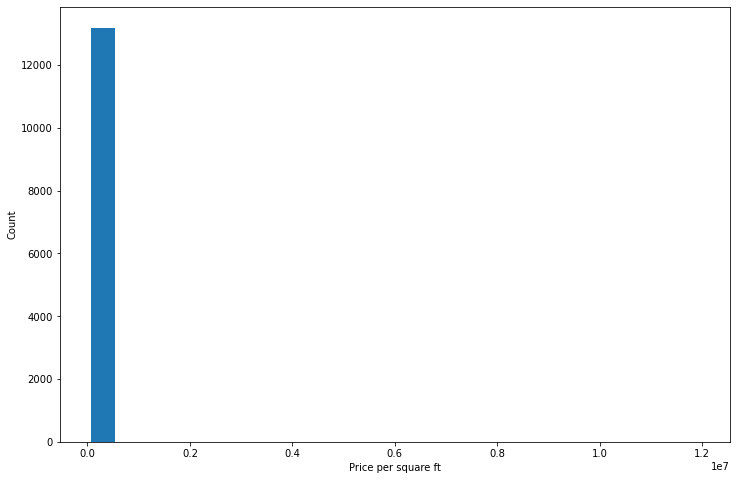

In [3]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

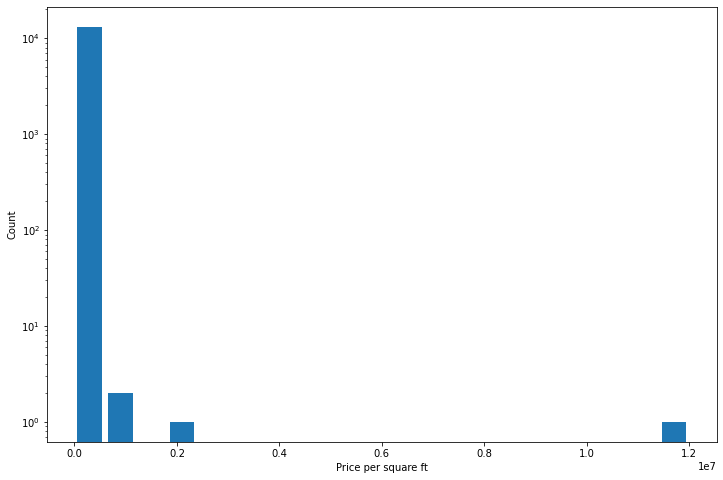

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [5]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [17]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
#outliers.sample(10)
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [7]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [8]:
df.shape

(13200, 7)

In [9]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [10]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [12]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [14]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [15]:
df3.shape

(13047, 7)

In [16]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

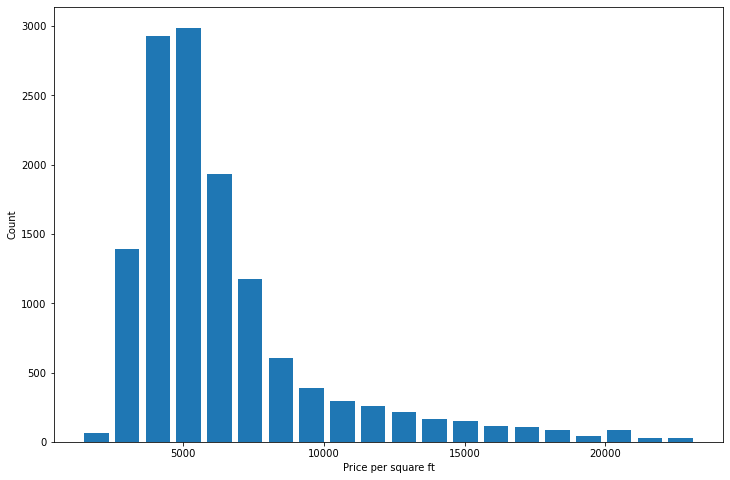

In [18]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

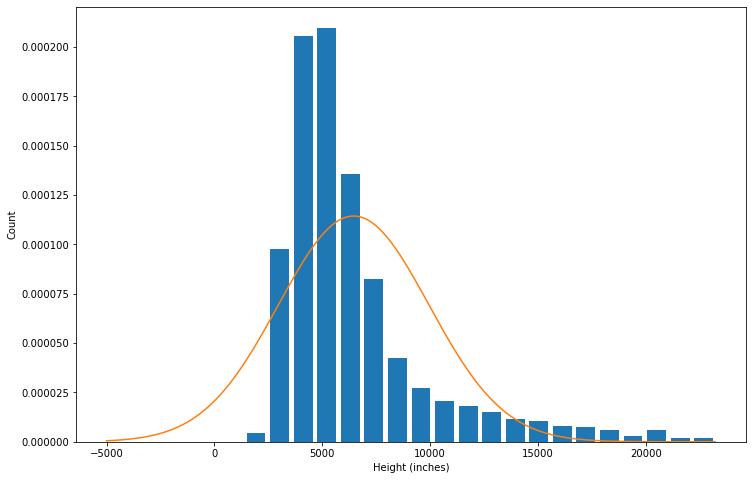

In [19]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [23]:
df2['zscore'] = ((df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std())
df2.sample(10)

C:\Users\mynud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10851,Hormavu,2 BHK,1250.0,2.0,65.00,2,5200,-0.353452
2010,Binny Pete,2 BHK,1245.0,2.0,86.28,2,6930,0.064319
12291,Sompura,3 BHK,1350.0,2.0,47.00,3,3481,-0.768567
9231,other,2 Bedroom,984.0,2.0,125.00,2,12703,1.458420
9960,other,2 BHK,1190.0,2.0,59.90,2,5033,-0.393781
12694,Yelahanka,2 BHK,1000.0,2.0,29.00,2,2900,-0.908871
6490,other,3 BHK,1602.0,2.0,165.00,3,10299,0.877887
1378,Doddathoguru,2 BHK,850.0,2.0,25.00,2,2941,-0.898970
2757,Rachenahalli,1 RK,440.0,1.0,28.00,1,6363,-0.072604
10631,JP Nagar,2 BHK,1060.0,2.0,33.95,2,3202,-0.835942


In [21]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [22]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629,5.545818
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050,6.613429
3500,Kundalahalli,1 BHK,2400.0,1.0,650.0,1,27083,4.930994
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000,6.118382
8499,other,4 BHK,7400.0,5.0,1850.0,4,25000,4.427977


In [24]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [25]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation